#  Exercise 1

Answer the quiz available via canvas

# Exercise 2: 

In [1]:
#  Install Required libraries 

!pip install scikit-learn
!pip install tensorflow



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


 # Exercise 3 

In [2]:
#  EDA

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import fetch_california_housing 


In [3]:
# Load the California housing dataset 
california_housing = fetch_california_housing() 
data = pd.DataFrame(data=np.c_[california_housing['data'], 
california_housing['target']], 
columns=california_housing['feature_names'] + ['target'])

In [4]:
#  Display the first few rows of the dataset
print(data.head())

#  Summary statistics of the numerical features
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

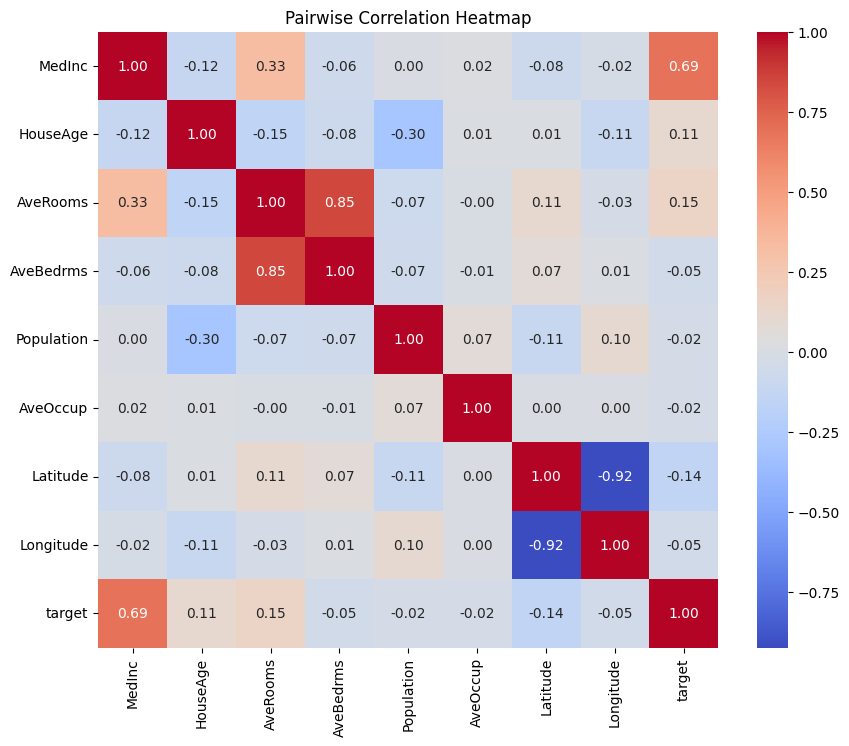

In [5]:
#  Pairwise correlation heatmap

correlation_matrix =  data.corr()
plt.figure(figsize=(10 , 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Pairwise Correlation Heatmap') 
plt.show() 


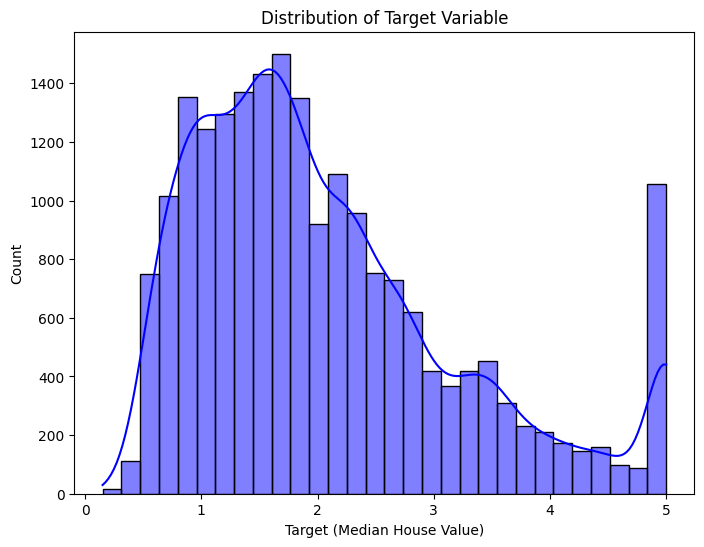

In [6]:
# Distribution of the target variable 
plt.figure(figsize=(8, 6)) 
sns.histplot(data['target'], bins=30, kde=True, color='blue') 
plt.title('Distribution of Target Variable') 
plt.xlabel('Target (Median House Value)') 
plt.show() 

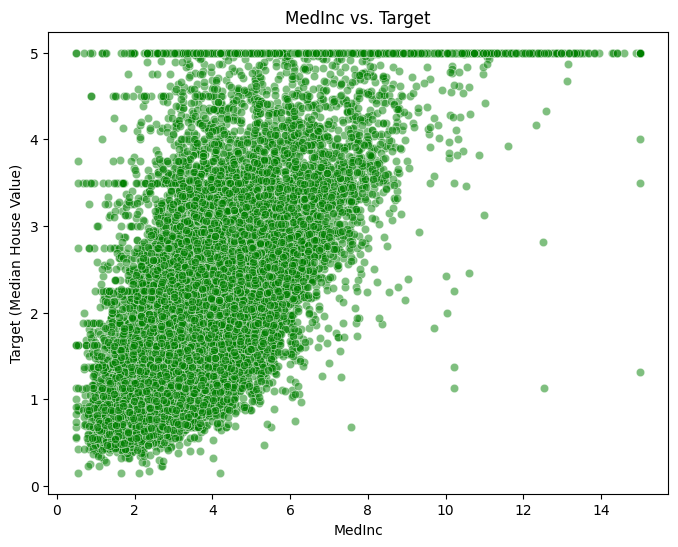

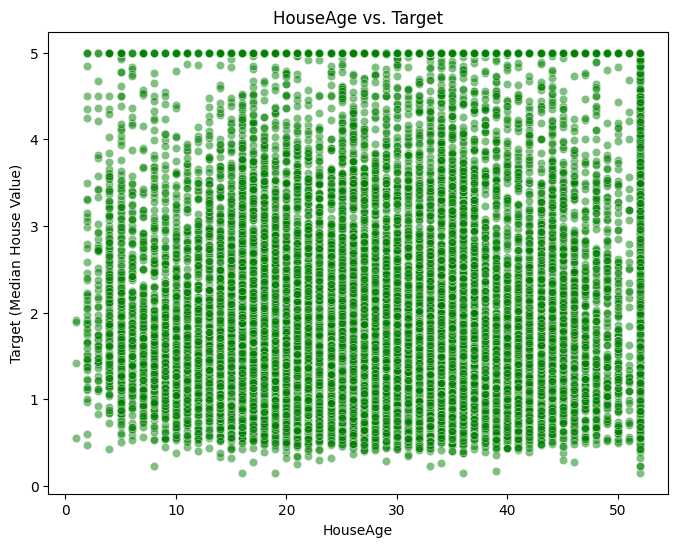

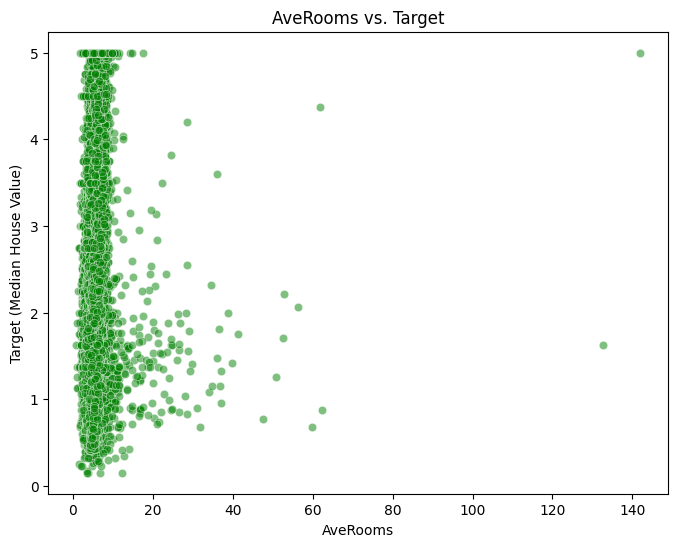

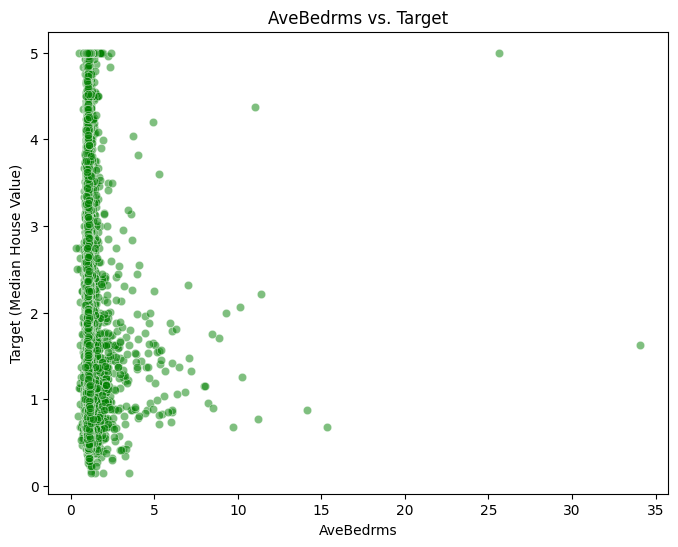

In [7]:
# Scatter plot of selected features against the target variable
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['target'], color='green', alpha=0.5)
    plt.title(f'{feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Target (Median House Value)')
    plt.show()

# Exercise 4

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


In [10]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [11]:
pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_valid) 

c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
mse = mean_squared_error(y_valid, y_pred)  # about 0.64 
rmse=np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.6409306727105066


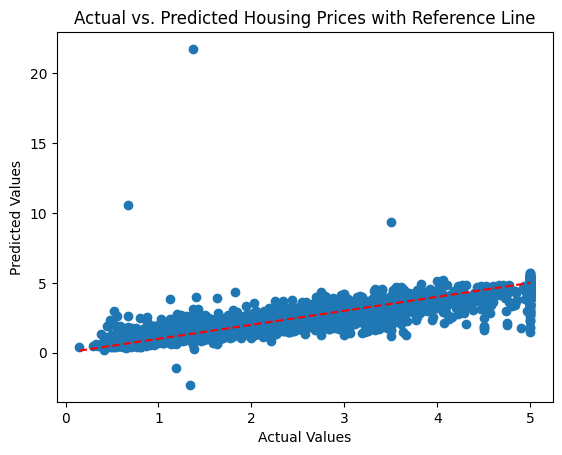

In [14]:
# Plot predicted vs. actual values 
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 
linestyle='--', color='red') 
plt.scatter(y_valid, y_pred) 
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.title('Actual vs. Predicted Housing Prices with Reference Line') 
plt.show() 

# Exercise 5

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [16]:
# Load the California housing dataset 
california_housing = fetch_california_housing() 
data = pd.DataFrame(data=np.c_[california_housing['data'], 
california_housing['target']], 
                    columns=california_housing['feature_names'] + ['target'])

In [17]:
# # Select features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [18]:
# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train the model 
model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, 
validation_data=(X_test_scaled, y_test), verbose=1) 

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1941 - val_loss: 0.6025
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5111 - val_loss: 0.4597
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4222 - val_loss: 0.4109
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3934 - val_loss: 0.4039
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3826 - val_loss: 0.3867
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3738 - val_loss: 0.3878
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3884 - val_loss: 0.3788
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3660 - val_loss: 0.3657
Epoch 9/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3578 - val_loss: 0.3611
Epoch 10/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3530 - val_loss: 0.3568
Epoch 11/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3660 - val_loss: 0.3519
Epoch 12/100
129/129 ━━━━━━━━━━━━━━━━━━━━

In [21]:
# Make predictions on the test set 
y_pred = model.predict(X_test_scaled) 

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)  #about 0.53 
rmse=np.sqrt(mse)
print("Root Mean Squared Error:", rmse) 

Root Mean Squared Error: 0.544698099035529


Text(0.5, 1.0, 'Actual vs. Predicted Housing Prices with Reference Line')

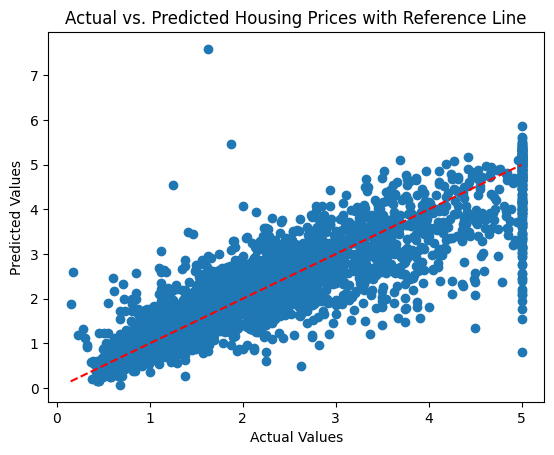

In [23]:
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red') 
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.title('Actual vs. Predicted Housing Prices with Reference Line') 

# Exercise 6

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42) 

Experiment with the split and record your results for 3 different splits. 

In [25]:
from keras.layers import Input
test_sizes = [0.2, 0.3, 0.5]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    model = Sequential([Dense(512, input_dim=X_train.shape[1], activation='relu'),
                        Dense(1, activation='linear')])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0)

    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test size {test_size} -> RMSE: {rmse}")

c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test size 0.2 -> RMSE: 2.7861408125804146


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test size 0.3 -> RMSE: 3.3334652347431137


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test size 0.5 -> RMSE: 2.046544328052145


#  Exercise 7

In [26]:
model = Sequential() 
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(units=1, activation='linear'))  # Linear activation for


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
import time
from keras.models import Sequential
from keras.layers import Dense


hidden_units = [256, 512, 1024]

for units in hidden_units:
    # Define ANN model
    model = Sequential()
    model.add(Dense(units=units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')

    start_time = time.time()
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0)
    end_time = time.time()

    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Hidden units {units} -> RMSE: {rmse:.4f}, Training time: {end_time - start_time:.2f} sec")

323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Hidden units 256 -> RMSE: 1.9620, Training time: 10.53 sec


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Hidden units 512 -> RMSE: 2.1066, Training time: 11.41 sec


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
Hidden units 1024 -> RMSE: 2.2126, Training time: 10.47 sec


# Exercise 8

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [29]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [30]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000,
random_state=42)

In [32]:
# Train the MLP model 
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

In [33]:
# Make predictions on the test set 
mlp_predictions = mlp_classifier.predict(X_test)

In [34]:
# Evaluate the MLP model
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.825


 # Experiment 9

Experiment with different sizes for hidden layer and compare them in terms of 
accuracy and training time.

In [35]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

hidden_sizes = [5, 20, 50, 100]
results = []

for size in hidden_sizes:
    start_time = time.time()

    mlp = MLPClassifier(
        hidden_layer_sizes=(size,),
        max_iter=1000,
        random_state=42
    )

    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    training_time = time.time() - start_time

    results.append((size, accuracy, training_time))

   
    print(f"Hidden units: {size} | Accuracy: {accuracy:.4f} | Training time: {training_time:.2f} seconds")


Hidden units: 5 | Accuracy: 0.8250 | Training time: 1.05 seconds


c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden units: 20 | Accuracy: 0.8200 | Training time: 1.54 seconds
Hidden units: 50 | Accuracy: 0.8300 | Training time: 1.52 seconds
Hidden units: 100 | Accuracy: 0.8150 | Training time: 1.68 seconds


# Exercise 10

In [36]:
from keras.models import Sequential 
from keras.layers import Dense 

In [37]:
# Create a simple ANN model 
ann_model = Sequential() 
ann_model.add(Dense(100, input_dim=X_train.shape[1], activation='relu')) 
ann_model.add(Dense(1, activation='sigmoid')) 
# Compile the model 
ann_model.compile(loss='binary_crossentropy', optimizer='adam', 
metrics=['accuracy']) 

c:\Users\sushm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Train the ANN model 
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7163 - loss: 0.5599
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4578 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.4014 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3643 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3404 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8900 - loss: 0.3218 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.3099 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8913 - loss: 0.2997 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8950 - loss: 0.2920 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.2853 


In [39]:
# Evaluate the ANN model 
_, ann_accuracy = ann_model.evaluate(X_test, y_test) 
print("ANN Accuracy:", ann_accuracy) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8500 - loss: 0.3701  
ANN Accuracy: 0.8500000238418579


# Exercise 11

 Experiment with different unit numbers and compare them in terms of accuracy 
and training time.

In [40]:
import time
from keras.models import Sequential
from keras.layers import Dense

unit_sizes = [50, 100, 200]

for units in unit_sizes:
    start_time = time.time()

    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        verbose=0
    )

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    training_time = time.time() - start_time

    print(f"Units: {units} | Accuracy: {accuracy:.4f} | Training time: {training_time:.2f} seconds")


Units: 50 | Accuracy: 0.8250 | Training time: 2.46 seconds
Units: 100 | Accuracy: 0.8550 | Training time: 2.79 seconds
Units: 200 | Accuracy: 0.8600 | Training time: 2.59 seconds


# Exercise 12

Add more layers to the ANN and report the change in the accuracy and training 
time. 

In [41]:
import time
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with deeper ANN
layer_configs = [
    [50],          
    [50, 50],      
    [50, 50, 50]   
]

for config in layer_configs:
    start_time = time.time()

    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    for units in config:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        X_train_scaled, y_train,
        epochs=20,
        batch_size=32,
        verbose=0
    )

    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    training_time = time.time() - start_time

    print(f"Layers: {config} | Accuracy: {accuracy:.4f} | Training time: {training_time:.2f} seconds")


Layers: [50] | Accuracy: 0.8550 | Training time: 3.59 seconds
Layers: [50, 50] | Accuracy: 0.8500 | Training time: 4.06 seconds
Layers: [50, 50, 50] | Accuracy: 0.8500 | Training time: 4.59 seconds
